In [ ]:
!wget https://raw.githubusercontent.com/tasdikrahman/datasets/master/email/csv/spam-apache.csv

--2021-10-17 03:20:43--  https://raw.githubusercontent.com/tasdikrahman/datasets/master/email/csv/spam-apache.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366506 (358K) [text/plain]
Saving to: ‘spam-apache.csv’

spam-apache.csv     100%[===================>] 357.92K  --.-KB/s    in 0.02s   

2021-10-17 03:20:43 (14.9 MB/s) - ‘spam-apache.csv’ saved [366506/366506]



In [ ]:
import numpy as np
import pandas as pd
import random
import re
import copy

emails = pd.read_csv('spam-apache.csv', header= None, names=['Labels', 'Emails'])


In [ ]:
#####Code from Geeks for Geeks to remove Html tags

from bs4 import BeautifulSoup
def remove_tags(html):
  
    # parse html content
    soup = BeautifulSoup(html, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [ ]:
def training(train_size):
  word_list = {}
  rnd_data = emails.sample(frac=1).reset_index(drop=True) #This randomizes the DataFrame
  training_data = rnd_data[:train_size].reset_index(drop =True)

  for (index, email) in enumerate(training_data['Emails']):
    #Cleaning Data 
    email_words = remove_tags(email)
    email_words = re.findall('[a-zA-Z]+', email.lower())
    for word in email_words:
      if not word in word_list.keys():
        word_list[word] = [0,0]
      word_list[word][int((training_data['Labels'][index] + 1) / 2)] += 1

  prob = copy.deepcopy(word_list)
  for key in prob:
    s = prob[key][0] + prob[key][1]
    prob[key][0] /= s
    if(abs(prob[key][0] - 0.0) < 0.000000001):
      prob[key][0] = 0.00000000001
    prob[key][1] /= s
    if(abs(prob[key][1] - 0.0) < 0.000000001):
      prob[key][1] = 0.00000000001
  return prob, word_list

In [ ]:
def prediction(email, bias, prob):
  b = bias
  email_words = remove_tags(email)
  email_words = re.findall('[a-zA-Z]+', email.lower())
  for word in email_words:
    if word in prob:
      b += np.log(prob[word][1]/ prob[word][0])
  return np.sign(b)

For training set of size: 20 the percantage correct was: 0.917%.
Predicted  -1.0   1.0
Actual               
-1          114     1
 1           18    97
For training set of size: 40 the percantage correct was: 0.733%.
Predicted  -1.0   1.0
Actual               
-1          104     0
 1           56    50
For training set of size: 60 the percantage correct was: 0.926%.
Predicted  -1.0   1.0
Actual               
-1           92     2
 1           12    84
For training set of size: 80 the percantage correct was: 0.953%.
Predicted  -1.0   1.0
Actual               
-1           79     4
 1            4    83
For training set of size: 100 the percantage correct was: 0.980%.
Predicted  -1.0   1.0
Actual               
-1           71     2
 1            1    76
For training set of size: 120 the percantage correct was: 0.985%.
Predicted  -1.0   1.0
Actual               
-1           63     2
 1            0    65
For training set of size: 140 the percantage correct was: 0.973%.
Predicted  -1.

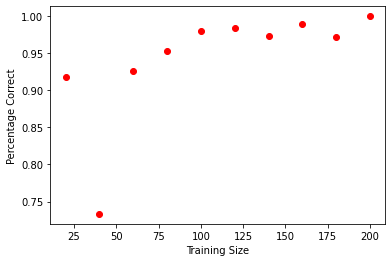

In [ ]:
import matplotlib.pyplot as plt

for train_size in range (20, 220, 20):
  spam = np.sum((emails['Labels'][:train_size] == -1) * 1) / train_size
  ham = 1 - spam
  bias = np.log(spam/ham)
  predictions = []
  prob, word = training(train_size)
  for(index, email) in enumerate(emails['Emails'][train_size:]):
    spamham = prediction(email, bias, prob)
    predictions.append(spamham)
  differences = predictions - emails['Labels'][train_size:]
  correctC = sum((differences ==0)*1)
  precentage_correct = correctC/len(predictions)
  print("For training set of size: %d the percantage correct was: %.3f%%."%( train_size, precentage_correct))
  plt.plot([train_size], [precentage_correct], 'ro')
  plt.xlabel("Training Size")
  plt.ylabel("Percentage Correct")
  data ={
   'y_actual': emails['Labels'][train_size:],
   'y_predictions': predictions
  }

  df = pd.DataFrame(data, columns=['y_actual','y_predictions'])

  confusion_matrix = pd.crosstab(df['y_actual'], df['y_predictions'], rownames=['Actual'], colnames=['Predicted'])
  print (confusion_matrix)